# Lent Practical 2: The Lorenz Heat Engine Model

## Housekeeping

Two important things to note before we start:

1. First, the theory behind this model will be covered in the lecture on Friday 2nd February. You might want to wait until after the lecture to start this practical.
2. This practical contains the first of the short-answer sections for the **Lab Report**!

### A Lab Report refresher:
 - The Lab report makes up 25% of your grade for QES.
 - It consists of five 'short answer' questions that are each worth 10% of the Lab Report, and one 'long answer' question worth 50%.
 - Each of the next five practicals will have a 'short answer' question at the end that is part of the Lab Report.
 - Each of these questions will require you to draw a single figure, and answer a few short questions in a maximum of 250 words.
 - We *strongly* advise you to do these questions as you go along, and not leave them all until the end!

## Introduction

In this practical we're going to be looking at a model of latidudinal heat transport proposed by Ralph Lorenz in 2001. You see the original paper [here](https://doi.org/10.1029/2000GL012336), if you want to know the full background.

Briefly, this model treats the Earth's hydrosphere like a heat engine, transferring heat from warm tropical regions to cooler areas, and using this energy to drive climate processes.
This heat flow's efficiency depends on the temperature difference between these areas.
Interestingly, Earth's climate seems to maximize entropy production, a measure of energy dispersal, though the reason for this preference is unclear.
Theories suggest that complex systems like Earth's atmosphere naturally evolve towards this state.

In the model heat flow $F$ (expressed as a power in $\mathrm{W}$, or a flux in $\mathrm{W~m^{−2}}$) flows from a warm reservoir at $T_L$ to a cool one at $T_H$. and entropy production $dS/dt$ is defined as $(F/T_H-F/T_L)$.
To get an idea what this means, let's consider its end-member states:
 - If the heat flow is zero, the entropy production is zero too, and each region of the planet is in radiative equilibrium.
 - If the heat flow is maximized, the planet is isothermal, $T_L=T_H$ and entropy production is again zero.
In between, however, entropy production is positive, and has a single maximum value.

Several studies have demonstrated that Earth's climate appears to exist in this maximum entropy production state.
It's not clear *why* this is the case, but it seems to be a common patter in complex systems.
The Lorenz model provides a way to explore this behaviour using a (relatively) simple 2-box model:

<img src="https://raw.githubusercontent.com/Quantitative-Environmental-Science/data/main/figures/Lorenz.png" width="60%"/>

In this model, the Tropics and Poles are represented by two boxes with equal surface are, at temperatures $T_L$ and $T_H$ respectively.
Each box receives an incoming solar energy $I_L$ and $I_H$, and has an outgoing radiative flux $E_L$, $E_H$.
Heat is transferred between the boxes by latitudinal heat flow $F$, which is proportional to the temperature difference between the boxes, $F=2D(T_L-T_H)$, where $D$ is a coefficient of meridional heat diffusion which represents the ‘ease’ with which the atmosphere transports heat.
The $E$, $I$ and $F$ are all normalized by area and have units of $\mathrm{W~m^{-2}}$.
$D$ has units $\mathrm{W~m^{-2}K^{-1}}$: the heat flow $F$ per unit area divided by twice the temperature difference.

This model simulates the annual average conditions on a planet. For simplicity, we can use the Budyko-Sellers model to represent the energy out $E$ as a linear function of temperature: $E_i=A+B \theta_i$, where $\theta_i$ is the temperature in $\mathrm{^{\circ}C}$, $B\approx 4 \sigma T^3/(1+0.75 \tau)$, $\sigma$ the Stefan-Boltzmann constant, and $\tau$ the infrared optical depth (typically of order one), $T$ is the typical planetary temperature in $\mathrm{K}$.<br>

For Earth: $I_L=300~\mathrm{W~m^{-2}}$, $I_H=170~\mathrm{W~m^{-2}}$, $B=4\sigma 288^3/2 \approx 1.35-5.4~\mathrm{W~m^{-2}C^{-1}}$. Empirically, the Earth’s climate can be reproduced with $D \approx 0.6-1.1~\mathrm{W~m^{−2}K^{−1}}$, corresponding to the observed heat flow $F$ of $20-40~\mathrm{W~m^{−2}}$ or $4-6 \times 10^{15}~\mathrm{W}$ per hemisphere.

Now we have a full description of the model, let's get started! There are two ways to approach this model - analytically, and numerically. We'll be trying both in this practical, and comparing the results.

## Analytical Solution

If we assume steady-state (i.e. that the sum of the inputs minus the outputs for each box equals zero), we can write our model as:

$$I_L-E_L-F=I_H-E_H+F $$

From this, we can calculate the temperature difference between the two boxes in terms of the Energy Inputs ($I_L$,$I_H$), coefficient of meridional heat diffusion ($D$) and the gradient of the Budyko-Sellers approximation for outgoing radiation ($B$). First, we substitute in the Budyko-Sellers approximation for outgoing radiation:

$$I_L-(A+B T_L)-F=I_H-(A+B T_H)+F $$

Then, we rearrange collect the $F$ terms on one side of the equation:

$$I_L-A-B T_L-I_H+A+B T_H=2F $$

The $A$ terms cancel, and this leads to an expression that contains the temperature difference between the boxes, $T_L-T_H$:

$$I_L - I_H - B(T_L-T_H) = 2F $$

Finally, we substitute in the expression for $F$, and represent $T_L-T_H$ with $\Delta T$:

$$I_L - I_H - B(\Delta T) = 4D(\Delta T) $$

Which can be rearranged to give:

$$\Delta T = \frac{I_L-I_H}{4D+B} $$

We can use this steady-state solution to calculate the entropy of the system, $(F/T_H-F/T_L)$, assuming that the temperature difference between the two boxes is symmetric: $T_L=T_{av}+\frac{\Delta T}{2}$, $T_H=T_{av}-\frac{\Delta T}{2}$ and $T_{av}=282.5$

**In the cell below:**
 - Calculate $\Delta T$ and the entropy of the system with a fixed value of B (`2.71`) for values of $D$ ranging between $10^{-2}-10^{2}$. Use values given in the introduction for the other parameters.
 - Create a two-panel figure, with the top panel showing the temperature of each box as a function of D, and the bottom panel showing the entropy of the system. Label your axes, and add a legend to the top panel noting which line is the high and low latitude boxes.
 - In the top plot, use `axhspan` to add horizontally shaded regions to indicate the approximate temperature range of the tropics and poles on Earth (between 15 to 27, and -5 to 5 $\mathrm{^{\circ}C}$).
 - In the top plot, use `axvline` to add a vertical line to indicate the value of $D$ that gives the maximum entropy production.

> **Hint1:** you might find it useful to use the `np.logspace` function to create a logarithmically spaced array of $D$ values for your calculation.

> **Hint2:** use `np.argmax` to find the index of the maximum Entropy value.

> **Hint3:** You should probably set the $x$ axis on a logarithmic scale using `ax.set_xscale`.


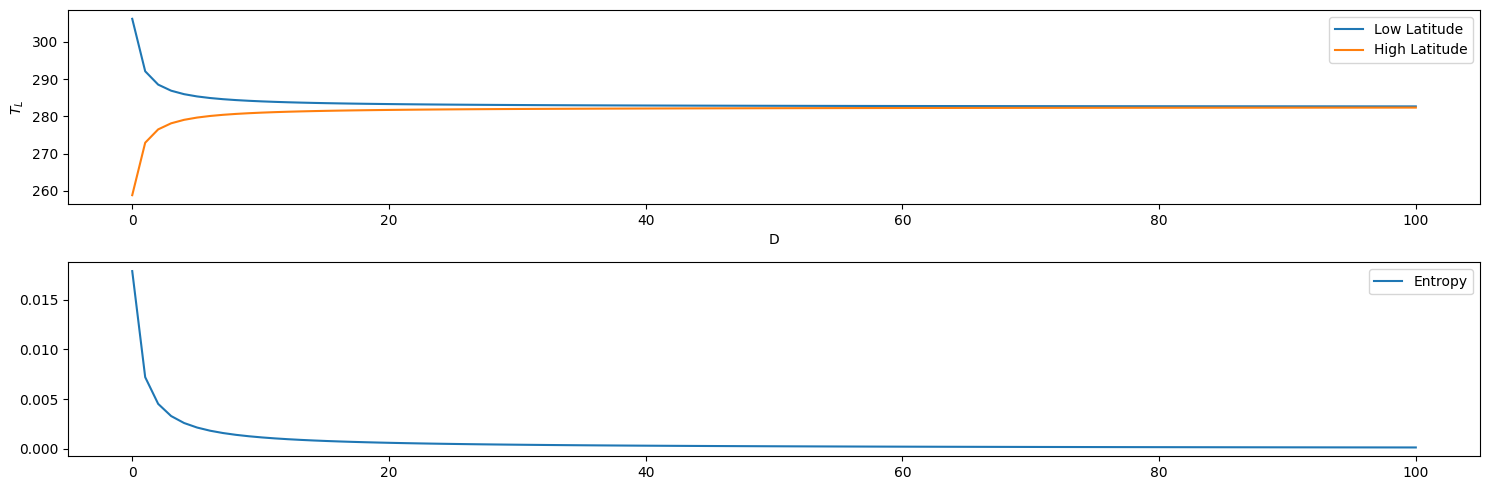

In [35]:
# Do it here!
import numpy as np
import matplotlib.pyplot as plt
B=2.71
D=np.linspace(1e-2,1e2,100)
Il=300
Ih=170
F=30
Tav=282.5

def delta_T(D,Il,Ih,B):
    return (Il-Ih)/(4*D+B)
def Tl(Tav,delta_T):
    return Tav+delta_T/2
def Th(Tav,delta_T):
    return Tav-delta_T/2
def Entropy(F,Tl,Th):
    return (F/Th-F/Tl)

#plt.plot(D,delta_T(D,Il,Ih,B))
#plt.xlabel('D')
#plt.ylabel('$\Delta T$')
#plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 5))
ax1.plot(D,Tl(Tav,delta_T(D,Il,Ih,B)),label='Low Latitude')
ax1.plot(D,Th(Tav,delta_T(D,Il,Ih,B)),label='High Latitude')
ax2.plot(D,Entropy(F,Tl(Tav,delta_T(D,Il,Ih,B)),Th(Tav,delta_T(D,Il,Ih,B))),label='Entropy')

ax1.set_xlabel('D')
ax1.set_ylabel('$T_L$')

ax1.legend(loc='best')
ax2.legend(loc='best')

plt.tight_layout()
plt.show()




### Think:

1. What do the average temperature ranges in the high and low latitude atmosphere tell you about the stability of the current latitudinal configuration of atmospheric temperature (think about the entropy that creates these temperatures)?
2. How well does the model represent reality? What processes in the atmosphere might invalidate the entropy of the system calculated from this model?

## Numerical Solution

The analytical solution above assumes a steady state... but is this reasonable? In simple systems, it probably is, but in more complex systems it might not be. The state of the system might oscillate around the steady state value (a limit cycle), or it might take so long to reach the steady state that it is never practically reached (aside: a system never *truly* reaches steady state, because this would take an infinitely long time... but for practical purposes, a system that is *close* to steady state is usually indistinguishable from one that is *at* steady state). This means that while steady state assumptions can be useful, it is also important to think about the time-dependant nature of the system.

For this, we need to solve the system numerically using **simulation**!

To do this, we need to think about the system in terms of a series of differential equations that can be solved numerically using the Euler method (which you met in the last practical).

For the Lorenz model, we can write:

$$
\frac{d[heat_L]}{dt}=I_L-E_L-F \\
\frac{d[heat_H]}{dt}=I_H-E_H+F
$$

This uses the principle of mass-balance to state that the change in heat in the box relative to time is calculated by the difference between the flux of energy into the box and the flux of energy leaving the box.

To convert this heat flux into the temperature of the box we need to know the heat capacity of the atmosphere ($C_a$), which is equal to the total mass of the atmosphere multiplied by the specific heat capacity at constant pressure:

$$
C_a =c_p*\frac{p_s}{g}=\frac{1004~\mathrm{J~K^{-1}kg^{-1}}\times10^{5}~\mathrm{Pa}}{9.81~\mathrm{m~s^{-2}}}=1.02\times10^{7}~\mathrm{J~K^{-1}m^{-2}}
$$<br>

We can then use the heat capacity of the atmosphere to calculate the heating effect of a difference in the two fluxes. For example, if we had an incoming radiation flux of $100~\mathrm{W~m^{-2}}$ (with no outgoing radiation), this would equate to a warming effect (or change in temperature) of $0.86~\mathrm{K~day^{-1}}$:
$$\frac{dT_a}{dt} = \frac{Flux}{C_a} = \frac{100~\mathrm{W~m^{-2}}}{1.02\times10^7~\mathrm{J~K^{-1}m^{-2}}} = 10^{-5}~\mathrm{K~s^{-1}} \times 86400~\mathrm{s~day^{-1}} = 0.86~\mathrm{K~day^{-1}}$$

We can now write the differential equations for the low and high latitude temperatures using the heat capacity of the atmosphere:
$$
\frac{d[T_L]}{dt}=\frac{I_L-E_L-F}{C_a} \\
\frac{d[T_H]}{dt}=\frac{I_H-E_H+F}{C_a}
$$

> **Hint**: Remember that these equations relate to the change in temperature per second as Watts are Joules per second...

**In the cell below:**
 - Use the Euler method to solve the differential equations for the low and high latitude temperatures for a year (365 days) using a timestep of 1 day.
 - Use parameter values $A$ = 203.3, $B$ = 2.71, $C_a$ = 1.02e7, $D$ = 0.85, $I_L$ = 300, $I_H$ = 170, start both $T_L$ and $T_H$ at the global average temperature of 282.5.
 - Create a 3 panel plot showing the evolution of model parameters as a function of time:
    - top: $T_L$ and $T_H$
    - middle: $E$ in each box, with the incoming solar radiation $I$ in each box shown for reference
    - bottom: Entropy of the system



In [ ]:
# Do it here!

Once you have your model working answer the following questions:

* What happens when you vary $D$ between 0.35 and 1.35?
    * Does this match what you found with the steady state model?
* How long does it take for the system to reach approximate "steady state"?
    * Think about this in terms of the seasons, how much do you think insolation varies seasonally, how will this impact the transfer of heat ($F$) in the atmosphere?
* What happens if you start your initial temperature of the High latitude box at the same temperature as the Low latitude box ($298~\mathrm{K}$)?
    * Why is the maximum temperature observed in the Low latitude box not the same as the steady state value?
    * Do you think this a real effect, and if so, what causes it?



# Lab Report Question 1

## Plot

Using the same approach as above we can now use nested for loops to visualise the impact of varying the initial temperatures in the boxes and the coefficient of meridional heat diffusion.

Test three values of D (0.35, 1.35, 5.0), and two sets of initial temperatures for the boxes: [305, 283] and [300, 273] for [$T_L$, $T_L$]. This should mean, for example, that the top plot panel has six lines representing $T_H$, and six lines for $T_L$, each calculated with a different combination of $D$ and [$T_L$, $T_L$] values.

You can use the pseudo-code below as a guide to do this:

```python
# first, create the figure and axes to draw the lines on

# next, define global model parameters that will be used in *all* version of the simulation (i.e. everything except D, and the initial TL and TH values)

colors = ['C0', 'C1', 'C2']  # define some colours for the lines
linestyles = ['--', ':']  # define some styles for the lines

# first loop!
for i, D in enumerate([0.35, 0.85, 1.35]):  # enumerate() is a useful function that returns the index of each item in a list, as well as the item itself
    # second loop!
    for j, (TL, TH) in enumerate([[305, 283], [300, 273]]):
        # create empty arrays to store the model output
        
        # set the initial conditions TL, TH, EL and EH

        # final loop!
        for t in range(1, number_of_days):
            # update the model in the loop, as you did above

        # plot the model output for each D, TL and TH combinations
        # set color=colors[i] to set the colour of the line corresponding to each D value
        # set linestyle=linestyles[j] to set the linestyle of the line corresponding to each TL and TH combination
        # do not set label=... at this stage, or you will have 3 legend entries for each line!

# add any labels and annotations to the plot
# manually add some legend entries using ax.plot([], [], color=..., linestyle=..., label=...) for each D value and TL and TH combination (there should be 5 legend entries in total)
```

## Questions

1. What determines the time it takes for the system to reach "steady state"?
2. Describe how $D$ and the starting temperature affect the Latitudinal Heat Flux ($F$) in the model. Explain the patterns you observe.

In [ ]:
# Do it here!